# 📊 Mini CRM – Proyecto Personal con SQLite y Python

Este proyecto simula un sistema de gestión de clientes y ventas (CRM) utilizando una base de datos relacional con SQLite, consultas SQL y visualizaciones con Python.

**Objetivos:**
- Practicar diseño de bases de datos relacionales.
- Ejecutar consultas SQL útiles para un entorno comercial.
- Visualizar datos de ventas e interacciones con clientes.


In [14]:
# Mini CRM - SQLite Setup en Google Colab
import sqlite3
import pandas as pd

conn = sqlite3.connect('crm.db')
cursor = conn.cursor()



# Crear tablas
cursor.executescript("""
DROP TABLE IF EXISTS sales_details;
DROP TABLE IF EXISTS sales;
DROP TABLE IF EXISTS products;
DROP TABLE IF EXISTS interactions;
DROP TABLE IF EXISTS clients;
DROP TABLE IF EXISTS employees;

CREATE TABLE clients (
    id INTEGER PRIMARY KEY AUTOINCREMENT,
    name TEXT,
    email TEXT,
    phone TEXT,
    address TEXT,
    created_at DATE
);

CREATE TABLE employees (
    id INTEGER PRIMARY KEY AUTOINCREMENT,
    name TEXT,
    email TEXT,
    hire_date DATE
);

CREATE TABLE products (
    id INTEGER PRIMARY KEY AUTOINCREMENT,
    name TEXT,
    price REAL,
    stock_quantity INTEGER,
    active BOOLEAN
);

CREATE TABLE sales (
    id INTEGER PRIMARY KEY AUTOINCREMENT,
    client_id INTEGER,
    employee_id INTEGER,
    sale_date DATE,
    total_amount REAL,
    FOREIGN KEY (client_id) REFERENCES clients(id),
    FOREIGN KEY (employee_id) REFERENCES employees(id)
);

CREATE TABLE sales_details (
    id INTEGER PRIMARY KEY AUTOINCREMENT,
    sale_id INTEGER,
    product_id INTEGER,
    quantity INTEGER,
    subtotal REAL,
    FOREIGN KEY (sale_id) REFERENCES sales(id),
    FOREIGN KEY (product_id) REFERENCES products(id)
);

CREATE TABLE interactions (
    id INTEGER PRIMARY KEY AUTOINCREMENT,
    client_id INTEGER,
    employee_id INTEGER,
    date DATE,
    type TEXT,
    notes TEXT,
    FOREIGN KEY (client_id) REFERENCES clients(id),
    FOREIGN KEY (employee_id) REFERENCES employees(id)
);
""")

conn.commit()
print("✅ Tablas creadas correctamente.")



✅ Tablas creadas correctamente.


## 📐 Modelo Relacional

El CRM incluye las siguientes entidades:
- **clients**: información de clientes
- **employees**: vendedores
- **products**: catálogo de productos
- **sales** y **sales_details**: transacciones de venta
- **interactions**: contactos con los clientes

Se respetan las relaciones 1:N y N:M necesarias mediante claves foráneas.


In [15]:
from datetime import datetime

# Insertar empleados
employees = [
    ("Laura Gómez", "laura@empresa.com", "2022-01-10"),
    ("Juan Pérez", "juan@empresa.com", "2023-03-15")
]
cursor.executemany("INSERT INTO employees (name, email, hire_date) VALUES (?, ?, ?);", employees)

# Insertar clientes
clients = [
    ("Carlos Sánchez", "carlos@email.com", "111-2222", "Av. Siempre Viva 123", "2023-10-01"),
    ("Ana Torres", "ana@email.com", "333-4444", "Calle Falsa 456", "2024-01-20")
]
cursor.executemany("INSERT INTO clients (name, email, phone, address, created_at) VALUES (?, ?, ?, ?, ?);", clients)

# Insertar productos
products = [
    ("Notebook Dell", 1200.0, 10, 1),
    ("Mouse Logitech", 25.0, 50, 1),
    ("Monitor Samsung", 300.0, 15, 1)
]
cursor.executemany("INSERT INTO products (name, price, stock_quantity, active) VALUES (?, ?, ?, ?);", products)

# Insertar ventas
sales = [
    (1, 1, "2024-03-01", 1250.0),  # Carlos compra notebook y mouse con Laura
    (2, 2, "2024-03-02", 600.0)    # Ana compra monitor con Juan
]
cursor.executemany("INSERT INTO sales (client_id, employee_id, sale_date, total_amount) VALUES (?, ?, ?, ?);", sales)

# Insertar detalles de ventas
sales_details = [
    (1, 1, 1, 1200.0),  # venta 1, notebook
    (1, 2, 1, 25.0),    # venta 1, mouse
    (2, 3, 2, 600.0)    # venta 2, monitor x2
]
cursor.executemany("INSERT INTO sales_details (sale_id, product_id, quantity, subtotal) VALUES (?, ?, ?, ?);", sales_details)

# Insertar interacciones
interactions = [
    (1, 1, "2024-02-25", "email", "Consulta sobre stock de notebooks."),
    (2, 2, "2024-03-01", "llamada", "Pedido de seguimiento postventa.")
]
cursor.executemany("INSERT INTO interactions (client_id, employee_id, date, type, notes) VALUES (?, ?, ?, ?, ?);", interactions)

conn.commit()
print("✅ Datos de prueba insertados correctamente.")


✅ Datos de prueba insertados correctamente.


## 📋 Consultas y Reportes Clave

Las siguientes consultas muestran información clave del CRM, como ventas totales, productos más vendidos e historial de interacciones.


In [16]:
# Convertir resultados SQL en DataFrame y mostrarlos

# 1. Ventas totales por cliente
query_ventas_por_cliente = """
SELECT c.name AS cliente, SUM(s.total_amount) AS total_ventas
FROM sales s
JOIN clients c ON s.client_id = c.id
GROUP BY c.name
ORDER BY total_ventas DESC;
"""
df_ventas_clientes = pd.read_sql_query(query_ventas_por_cliente, conn)
print("Ventas totales por cliente:")
display(df_ventas_clientes)

# 2. Productos mas vendidos
query_productos_mas_vendidos = """
SELECT p.name AS producto, SUM(sd.quantity) AS cantidad_vendida
FROM sales_details sd
JOIN products p ON sd.product_id = p.id
GROUP BY p.name
ORDER BY cantidad_vendida"""
df_productos = pd.read_sql_query(query_productos_mas_vendidos, conn)
print("Productos más vendidos:")
display(df_productos)

#3. Interecciones por cliente
query_interacciones_por_cliente = """
SELECT c.name AS cliente, COUNT(*) AS total_interacciones
FROM interactions i
JOIN clients c ON i.client_id = c.id
GROUP BY c.name
ORDER BY total_interacciones DESC;
"""
df_interaciones = pd.read_sql_query(query_interacciones_por_cliente, conn)
print("Interacciones por cliente:")
display(df_interaciones)




Ventas totales por cliente:


,cliente,total_ventas
0,Carlos Sánchez,1250.0
1,Ana Torres,600.0


Productos más vendidos:


,producto,cantidad_vendida
0,Mouse Logitech,1
1,Notebook Dell,1
2,Monitor Samsung,2


Interacciones por cliente:


,cliente,total_interacciones
0,Carlos Sánchez,1
1,Ana Torres,1


(array([0, 1, 2]),
 [Text(0, 0, 'Mouse Logitech'),
  Text(1, 0, 'Notebook Dell'),
  Text(2, 0, 'Monitor Samsung')])

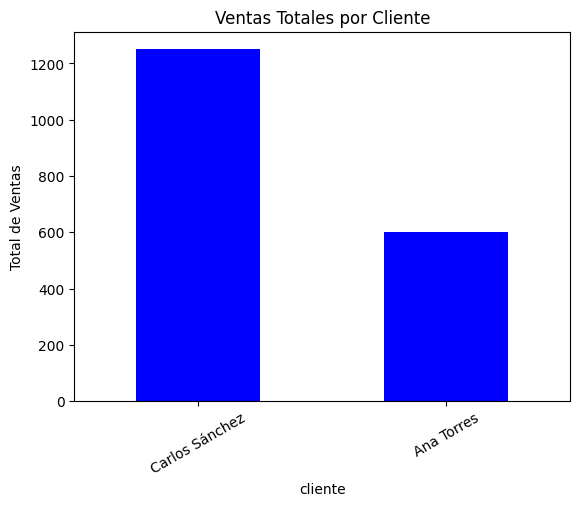

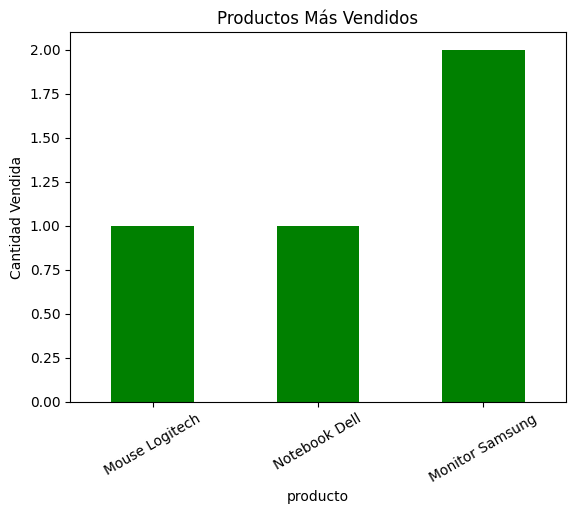

In [20]:
import matplotlib.pyplot as plt

# Gráfico de ventas por cliente
df_ventas_clientes.plot(kind='bar', x='cliente', y='total_ventas', legend=False, color='blue')
plt.title("Ventas Totales por Cliente")
plt.ylabel("Total de Ventas")
plt.xticks(rotation=30)

# Gráfico de productos más vendidos
df_productos.plot(kind='bar', x='producto', y='cantidad_vendida', legend=False, color='green')
plt.title("Productos Más Vendidos")
plt.ylabel("Cantidad Vendida")
plt.xticks(rotation=30)


## ✅ Conclusiones

Este mini CRM demuestra el uso de bases de datos relacionales y análisis básico de datos comerciales.

**Habilidades aplicadas:**
- Modelado y diseño de base de datos (SQLite)
- Consultas SQL complejas (JOIN, GROUP BY, agregaciones)
- Visualización de resultados con Python
- Automatización de reportes

**Siguientes pasos posibles:**
- Crear una interfaz visual con Streamlit o Flask
- Implementar autenticación de usuarios
- Agregar carga de datos desde formularios o CSV
